<a href="https://colab.research.google.com/github/YoneDelCastillo/TFG-Ec.-Maxwell-no-lineales./blob/main/TFG_2D_lineal_homogeneo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#MODULOS DE PYTHON

#Librerías:
#Para cálculos y gráficas:
import numpy as np
import matplotlib.pyplot as plt
#Para la animación:
import matplotlib.animation as animation

In [2]:
#DEFINICION DE VARIABLES Y PARAMETROS

#Número de puntos espaciales
Lx = 1
dx = 0.02
Ly = 1
dy = 0.02

Nx = int(Lx/dx)+1
Ny = int(Ly/dx)+1

#Número de intervalos temporales
T = 2.5
dt = 0.0001

Nt = int(T/dt)+1

# σ/ε = a
a = 0
# σ*/μ = b
b = 0
# ε
e = 1
# μ
u = 1

#Definicion de los campos
xy  = np.zeros((2,Nx,Ny))
Ex = np.zeros((Nx,Ny,Nt))
Ey = np.zeros((Nx,Ny,Nt))
Hz = np.zeros((Nx,Ny,Nt))

#Condiciones iniciales
def Gauss(x,y,x0,y0,a,b,A):
  y = A*np.exp(-(x-x0)**2/(2*a**2)-(y-y0)**2/(2*b**2))
  return y

#Imponemos las condiciones iniciales a Ey y Hz
#Al mismo tiempo estamos imponiendo las condiciones de contorno de pozo de potencial infinito
for j in np.arange(1,Ny-1):
  for i in np.arange(1,Nx-1):
    xy[:,i,j] = [i*dx,j*dy]
    # Ex[i,j,0] = Gauss(i*dx,j*dy,0.25*Lx,0.5*Ly,0.01,0.07,1)
    Ey[i,j,0] = Gauss(i*dx,j*dy,0.15*Lx     ,0.5*Ly,0.05,0.15,1)*np.sin((2*np.pi/(0.1*Lx))*i*dx)
    Hz[i,j,0] = Gauss(i*dx,j*dy,0.15*Lx-dx/2,0.5*Ly,0.05,0.15,1)*np.sin((2*np.pi/(0.1*Lx))*i*dx)


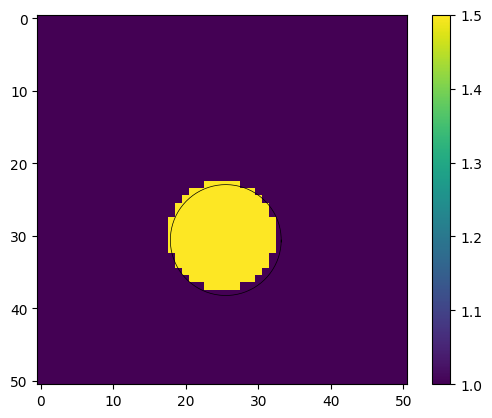

In [10]:
#GEOMETRÍA DE PERMITIVIDAD

R = 0.15*np.sqrt(Lx*Ly) #Radio del círculo
X0 = 0.6*Lx             #Centro del círculo
Y0 = 0.5*Ly

def dist(x,y,x0,y0):
  D = np.sqrt((x-x0)**2+(y-y0)**2)
  return D

geo = np.ones((Nx,Ny))
for j in np.arange(0,Ny):
  for i in np.arange(0,Nx):
    if dist(i*dx,j*dy,X0,Y0) <= R:
      geo[i,j] = 1.5

e = geo
u = geo

#Frontera entre medios
ang = np.arange(0,2*np.pi+0.08,0.08)
x = R*np.cos(ang)+Y0
y = R*np.sin(ang)+X0


plt.imshow(geo)
plt.colorbar()
plt.plot(x*Nx,y*Nx,"k-",linewidth=0.5)

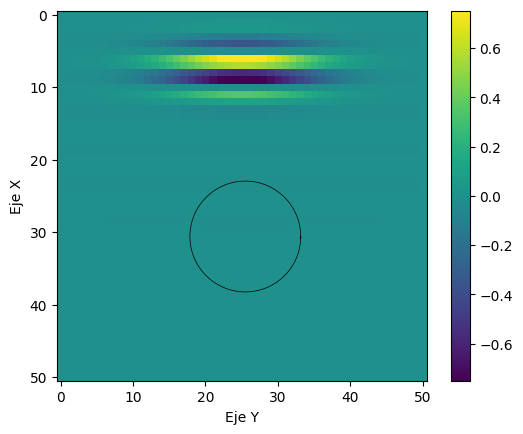

In [9]:
plt.imshow(Ey[:,:,0],vmin=-0.75,vmax=0.75)
plt.xlabel("Eje Y")
plt.ylabel("Eje X")
plt.colorbar()

plt.plot(x*Nx,y*Nx,"k-",linewidth=0.5)

In [ ]:
#ALGORITMO DE YEE
#Conductividades σ,σ* distintas de 0

for n in np.arange(0,Nt-1):
  if n == int(0.25*Nt):
    print("25%")
  elif n == int(0.5*Nt):
    print("50%")
  elif n == int(0.75*Nt):
    print("75%")
  for j in np.arange(1,Ny-1):
    for i in np.arange(1,Nx-1):
      Hz[i,j,n+1] = (1-0.5*b*dt)/(1+0.5*b*dt)*Hz[i,j,n] + ((dt/u)/(1+0.5*b*dt))*((Ey[i,j,n]-Ey[i+1,j,n])/dx + (Ex[i,j+1,n]-Ex[i,j,n])/dy)
      Ey[i,j,n+1] = (1-0.5*a*dt)/(1+0.5*a*dt)*Ey[i,j,n] + ((dt/e)/(1+0.5*a*dt))*( Hz[i-1,j,n]-Hz[i,j,n])/dx
      Ex[i,j,n+1] = (1-0.5*a*dt)/(1+0.5*a*dt)*Ex[i,j,n] + ((dt/e)/(1+0.5*a*dt))*( Hz[i,j,n]-Hz[i,j-1,n])/dy

In [ ]:
#ALGORITMO DE YEE
#Conductividades σ,σ* = 0

for n in np.arange(0,Nt-1):
  if n == int(0.25*Nt):
    print("25%")
  elif n == int(0.5*Nt):
    print("50%")
  elif n == int(0.75*Nt):
    print("75%")
  elif n == int(0.9*Nt):
    print("90%")
  elif n == Nt-2:
    print("100%")
  for j in np.arange(1,Ny-1):
    for i in np.arange(1,Nx-1):
      Hz[i,j,n+1] = Hz[i,j,n] + (dt/u)*((Ey[i,j,n]-Ey[i+1,j,n])/dx + (Ex[i,j+1,n]-Ex[i,j,n])/dy)
      Ey[i,j,n+1] = Ey[i,j,n] + (dt/e)*( Hz[i-1,j,n]-Hz[i,j,n])/dx
      Ex[i,j,n+1] = Ex[i,j,n] + (dt/e)*( Hz[i,j,n]-Hz[i,j-1,n])/dy

In [ ]:
#ALGORITMO DE YEE
#Conductividades σ,σ* = 0
# ε y μ discontinuos

for n in np.arange(0,Nt-1):
  if n == int(0.25*Nt):
    print("25%")
  elif n == int(0.5*Nt):
    print("50%")
  elif n == int(0.75*Nt):
    print("75%")
  elif n == int(0.9*Nt):
    print("90%")
  elif n == Nt-2:
    print("100%")
  for j in np.arange(1,Ny-1):
    for i in np.arange(1,Nx-1):
      Hz[i,j,n+1] = Hz[i,j,n] + (dt/u[i,j])*((Ey[i,j,n]-Ey[i+1,j,n])/dx + (Ex[i,j+1,n]-Ex[i,j,n])/dy)
      Ey[i,j,n+1] = Ey[i,j,n] + (dt/e[i,j])*( Hz[i-1,j,n]-Hz[i,j,n])/dx
      Ex[i,j,n+1] = Ex[i,j,n] + (dt/e[i,j])*( Hz[i,j,n]-Hz[i,j-1,n])/dy

25%


In [ ]:
#ALGORITMO DE YEE
#Conductividades σ,σ* = 0

for n in np.arange(0,Nt-1):
  for j in np.arange(1,Ny-1):
    for i in np.arange(1,Nx-1):
      Hz[i,j,n+1] = Hz[i,j,n] + (dt/u)*((Ey[i,j,n]-Ey[i+1,j,n])/dx + (Ex[i,j+1,n]-Ex[i,j,n])/dy)
      Ey[i,j,n+1] = Ey[i,j,n] + (dt/e)*( Hz[i-1,j,n]-Hz[i,j,n])/dx
      Ex[i,j,n+1] = Ex[i,j,n] + (dt/e)*( Hz[i,j,n]-Hz[i,j-1,n])/dy

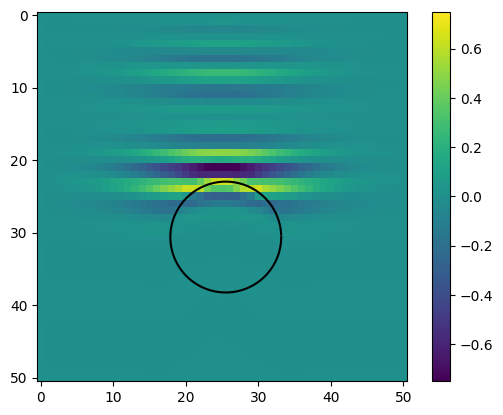

In [ ]:
n = int(0.15*Nt)
plt.imshow(Ey[:,:,n],vmin=-0.75,vmax=0.75)
plt.colorbar()

plt.plot(x*Nx,y*Nx,"k-")

In [ ]:
#                       ANIMACIÓN

#Animación:
T_anim =  10   #seg
num_fps = 25
num_frames = T_anim*num_fps

Coef_prop = int(Nt/num_frames)

#Definimos una función que crea un frame de la animación
fig,ax = plt.subplots()

ims = []
for n in np.arange(0,num_frames):
    n=Coef_prop*n
    im = ax.imshow( Ey[:,:,n],interpolation = "gaussian",vmin=-0.75,vmax=0.75,animated = True)
    plt.xlabel("Eje Y")
    plt.ylabel("Eje X")
    plt.plot(x*Nx,y*Nx,"k-")
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=int(1/num_fps*1000), blit=True)
plt.close()

if Coef_prop < 1:
  print("La animación no puede ser tan larga. La duración máxima posible es de %i s"%(Nt/num_fps))

In [ ]:
#Esta función de matplot guarda el Vídeo
ani.save("Prueba15_Ey_Geom_Interpol.mp4")